# Proyecto Final de Estadística
# Análisis de las muertes en el Conflicto Israeli-Palestino desde el año 2000 hasta el 2022

### Equipo del C311
- Daniel Machado Pérez
- Daniel Toledo Martínez
- Osvaldo R. Moreno Prieto

In [62]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [63]:
data_path = 'fatalities_isr_pse_conflict_2000_to_2023.csv'
df = pd.read_csv(data_path)

## Descripción de los datos

In [64]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [65]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [66]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

In [67]:
df.shape

(11124, 16)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [69]:
df.nunique()


name                            11083
date_of_event                    2405
age                                95
citizenship                         4
event_location                    494
event_location_district            20
event_location_region               3
date_of_death                    2593
gender                              2
took_part_in_the_hostilities        5
place_of_residence                580
place_of_residence_district        20
type_of_injury                     13
ammunition                         21
killed_by                           3
notes                            6744
dtype: int64

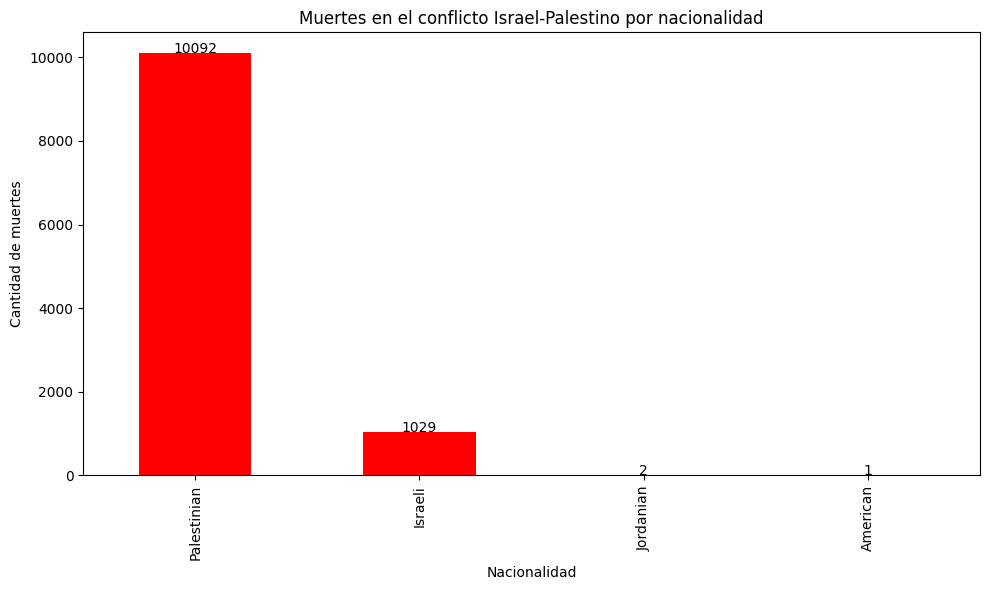

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar el número de muertes por nacionalidad
deaths_by_nationality = df['citizenship'].value_counts()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))  # Tamaño opcional de la figura

# Plotear la gráfica de barras
bars = deaths_by_nationality.plot(kind='bar', color='red')

# Añadir etiquetas y título
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de muertes')
plt.title('Muertes en el conflicto Israel-Palestino por nacionalidad')

# Mostrar el número correspondiente encima de cada barra
for i, v in enumerate(deaths_by_nationality):
    bars.text(i, v + 0.1, str(v), ha='center')

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño
plt.show()


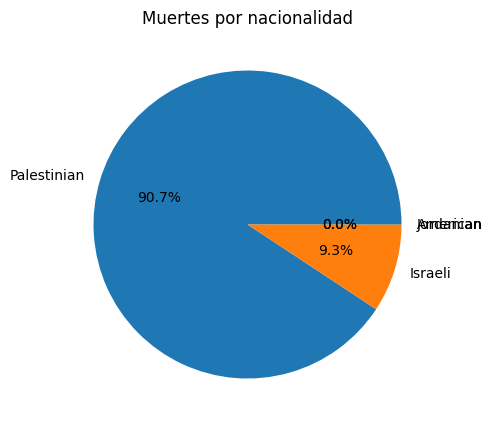

In [71]:
# Extract the column containing categorical data
column_values = df['citizenship']

# Calculate the count of each category
category_counts = column_values.value_counts()

# Plotting
plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Muertes por nacionalidad')
plt.show()

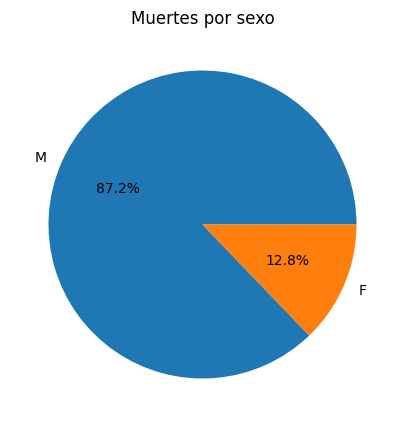

In [72]:
# Extract the column containing categorical data
column_values = df['gender']

# Calculate the count of each category
category_counts = column_values.value_counts()

# Plotting
plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Muertes por sexo')
plt.show()

#### Cantidad de mujeres fallecidas por nacionalidad

In [73]:

result = df[df['gender'] == 'F'].groupby('citizenship').size()
sorted_result = result.sort_values(ascending = False)
sorted_result.head()

citizenship
Palestinian    1091
Israeli         331
Jordanian         1
dtype: int64

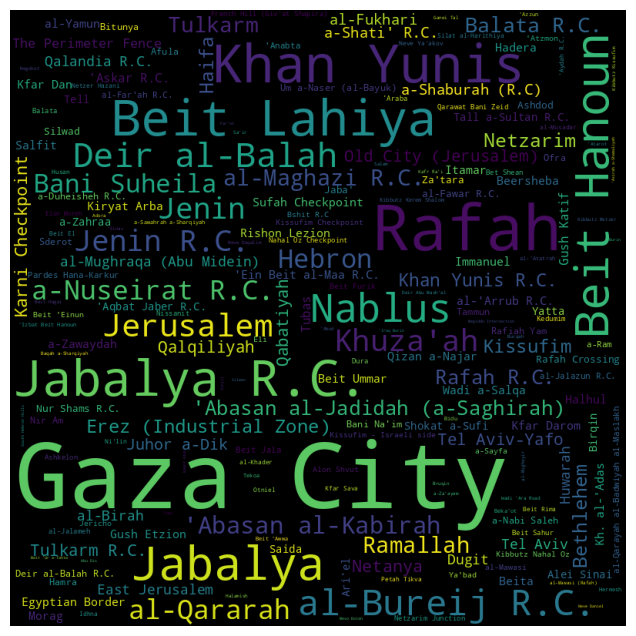

In [74]:
from wordcloud import WordCloud


deaths_by_region = df['event_location'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_region))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

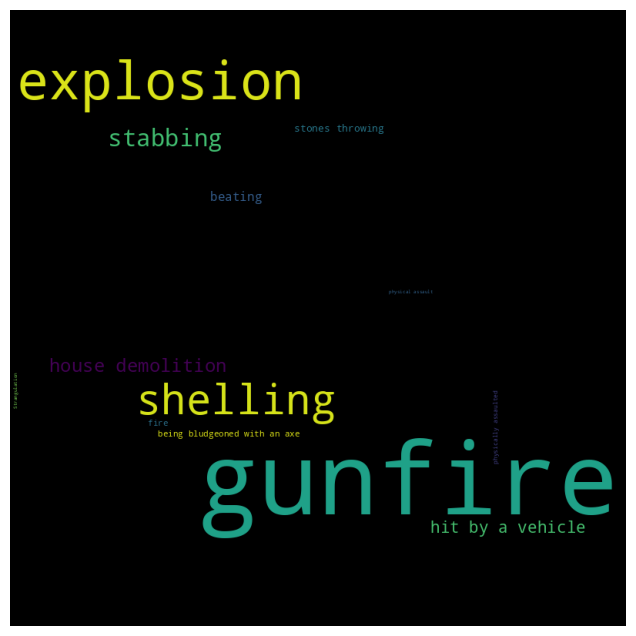

In [75]:
from wordcloud import WordCloud


deaths_by_region = df['type_of_injury'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_region))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

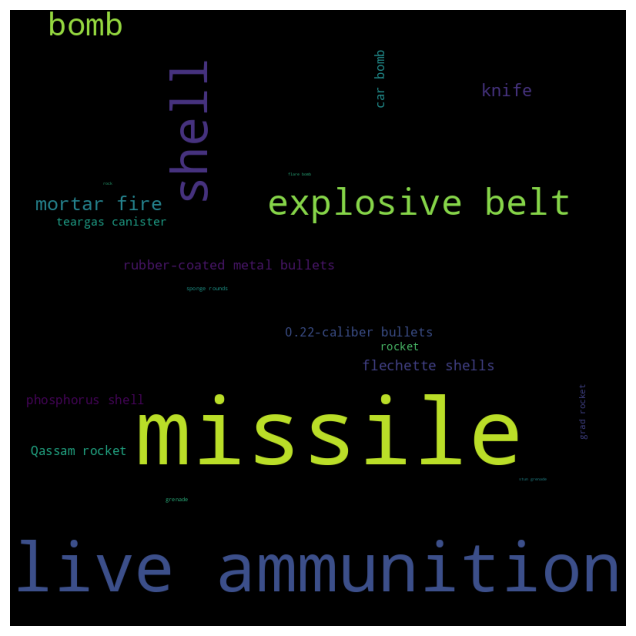

In [76]:
from wordcloud import WordCloud


deaths_by_region = df['ammunition'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_region))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

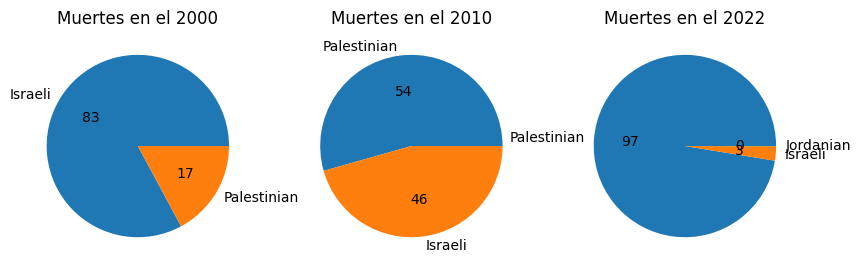

In [77]:
# Convertir la columna 'date_of_event' a tipo datetime si aún no lo está
df['date_of_event'] = pd.to_datetime(df['date_of_event'])

counts_2000 = df.loc[df['date_of_event'].dt.year == 2000]['citizenship'].value_counts()
counts_2010 = df.loc[df['date_of_event'].dt.year == 2001]['citizenship'].value_counts()
counts_2022 = df.loc[df['date_of_event'].dt.year == 2014]['citizenship'].value_counts()

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].pie(counts_2000[:5], labels=counts_2000[:5].index, autopct=lambda x: f'{x:.0f}')
axs[0].set_title('Muertes en el 2000')

axs[1].pie(counts_2010[:5], labels=counts_2010[:5].index, autopct=lambda x: f'{x:.0f}')
axs[1].set_title('Muertes en el 2010')

axs[2].pie(counts_2022[:5], labels=counts_2022[:5].index, autopct=lambda x: f'{x:.0f}')
axs[2].set_title('Muertes en el 2022')

plt.show()

#### Gráficos de barras para las variables categóricas 

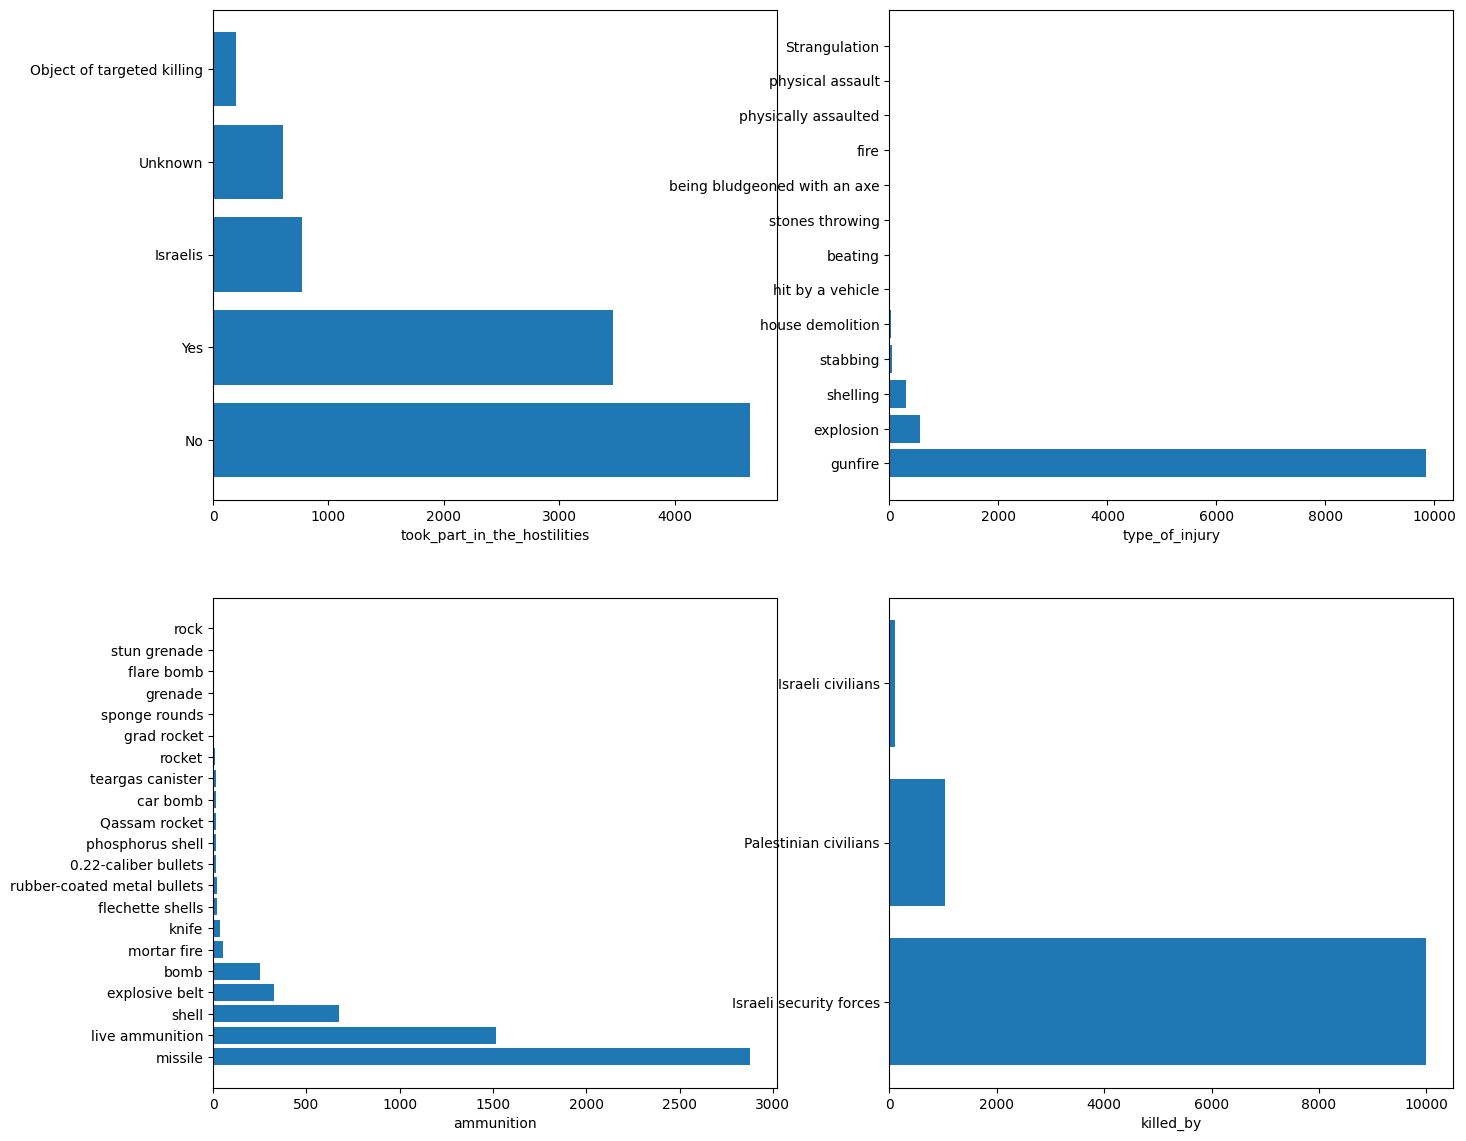

In [78]:
bar_cols = ['took_part_in_the_hostilities', 'type_of_injury', 'ammunition', 'killed_by']
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize=(16,14))
for i in range(2):
    for j in range(2):
        counts = df[bar_cols[i*2 + j]].value_counts()
        ax[i,j].barh(counts.index, counts.values)
        ax[i,j].set_xlabel(bar_cols[i*2 + j])

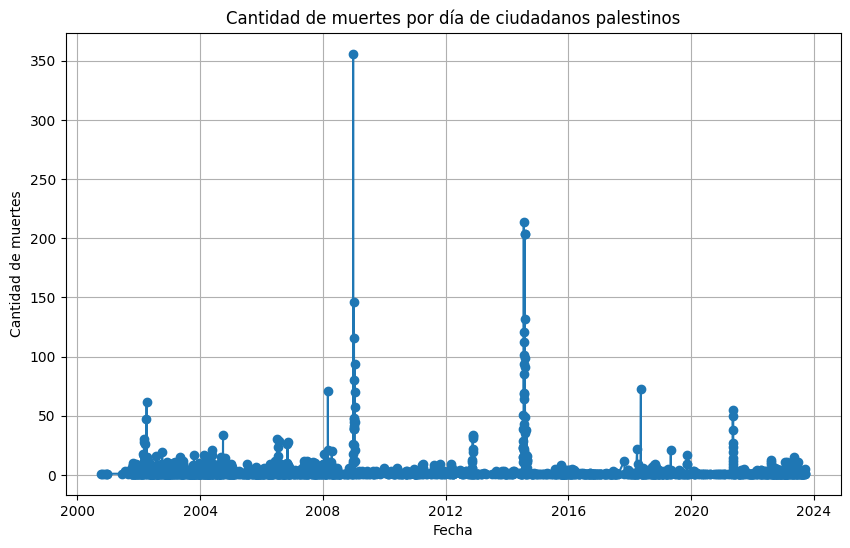

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

# Filtrar los datos para incluir solo las muertes de ciudadanos palestinos
df_palestinian = df[df['citizenship'] == 'Palestinian'].copy()

# Convertir la columna de fecha a formato datetime
df_palestinian['date_of_event'] = pd.to_datetime(df_palestinian['date_of_event'])

# Agrupar por día y contar la cantidad de muertes en cada día
palestinian_deaths_per_day = df_palestinian.groupby(df_palestinian['date_of_event'].dt.date).size()

# Graficar la cantidad de muertes por día
plt.figure(figsize=(10, 6))
palestinian_deaths_per_day.plot(kind='line', marker='o')
plt.title('Cantidad de muertes por día de ciudadanos palestinos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de muertes')
plt.grid(True)
plt.show()

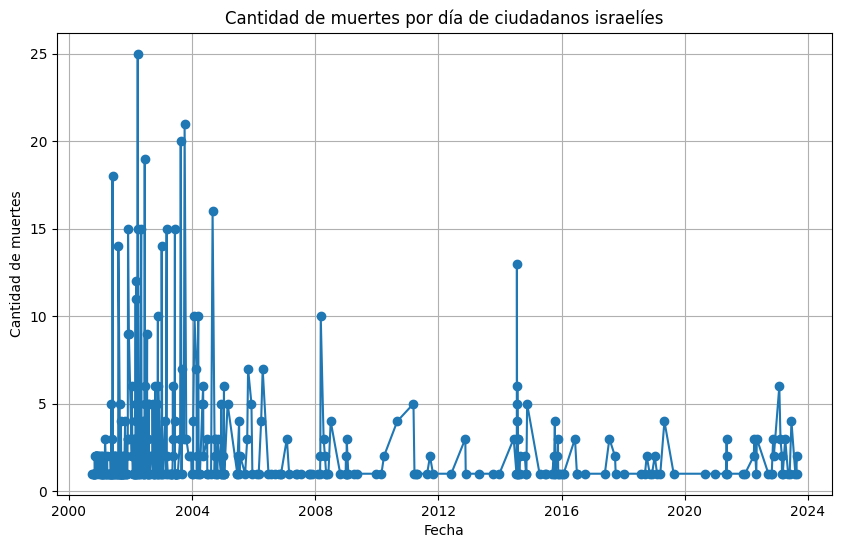

In [80]:
# Filtrar los datos para incluir solo las muertes de ciudadanos israelíes
df_israeli = df[df['citizenship'] == 'Israeli'].copy()

# Convertir la columna de fecha a formato datetime
df_israeli['date_of_event'] = pd.to_datetime(df_israeli['date_of_event'])

# Agrupar por día y contar la cantidad de muertes en cada día
israeli_deaths_per_day = df_israeli.groupby(df_israeli['date_of_event'].dt.date).size()

# Graficar la cantidad de muertes por día
plt.figure(figsize=(10, 6))
israeli_deaths_per_day.plot(kind='line', marker='o')
plt.title('Cantidad de muertes por día de ciudadanos israelíes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de muertes')
plt.grid(True)
plt.show()

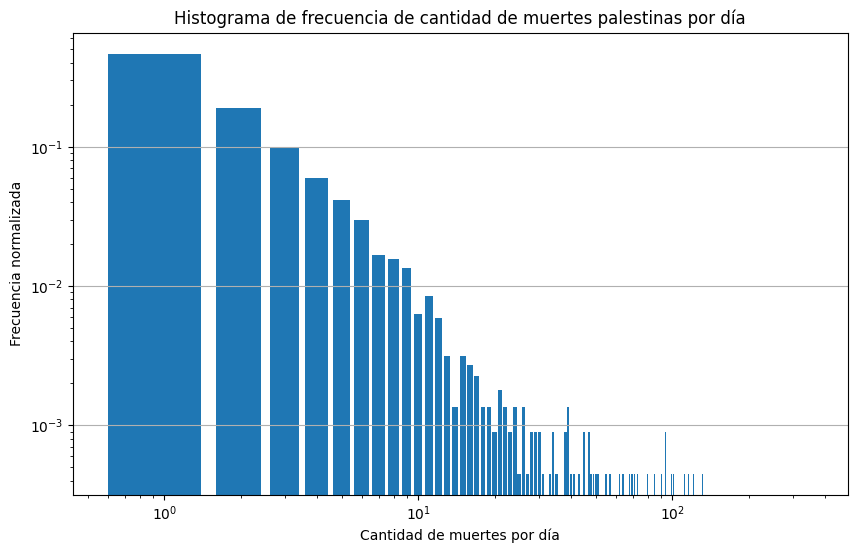

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por día y contar la cantidad de muertes en cada día
palestinian_deaths_per_day = df_palestinian.groupby(df_palestinian['date_of_event'].dt.date).size()

# Calcular las frecuencias normalizadas de las cantidades de muertes
palestinian_hist_data = palestinian_deaths_per_day.value_counts(normalize=True).sort_index()

# Graficar el histograma de frecuencia normalizada
plt.figure(figsize=(10, 6))
plt.bar(palestinian_hist_data.index, palestinian_hist_data.values)
plt.title('Histograma de frecuencia de cantidad de muertes palestinas por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Frecuencia normalizada')
plt.grid(axis='y')
plt.yscale('log')
plt.xscale('log')
plt.show()


In [82]:
# Encontrar el día con más muertes
max_deaths_day = palestinian_deaths_per_day.idxmax()

# Obtener la cantidad de muertes en el día con más muertes
max_deaths = palestinian_deaths_per_day[max_deaths_day]

print("El día con más muertes palestinas fue el", max_deaths_day, "con", max_deaths, "muertes.")

El día con más muertes palestinas fue el 2008-12-27 con 356 muertes.


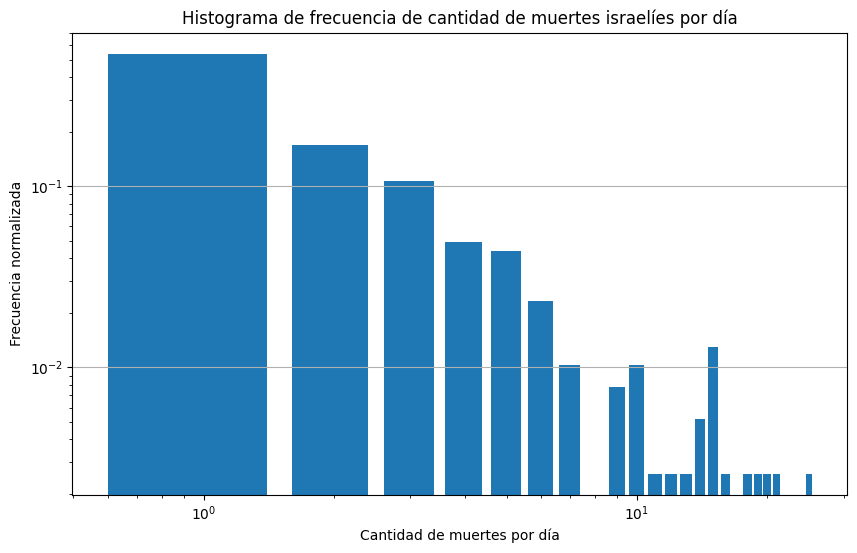

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por día y contar la cantidad de muertes en cada día
israeli_deaths_per_day = df_israeli.groupby(df_israeli['date_of_event'].dt.date).size()

# Calcular las frecuencias normalizadas de las cantidades de muertes
israeli_hist_data = israeli_deaths_per_day.value_counts(normalize=True).sort_index()

# Graficar el histograma de frecuencia normalizada
plt.figure(figsize=(10, 6))
plt.bar(israeli_hist_data.index, israeli_hist_data.values)
plt.title('Histograma de frecuencia de cantidad de muertes israelíes por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Frecuencia normalizada')
plt.grid(axis='y')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [84]:
# Encontrar el día con más muertes
max_deaths_day = israeli_deaths_per_day.idxmax()

# Obtener la cantidad de muertes en el día con más muertes
max_deaths = israeli_deaths_per_day[max_deaths_day]

print("El día con más muertes fue el", max_deaths_day, "con", max_deaths, "muertes.")

El día con más muertes fue el 2002-03-27 con 25 muertes.


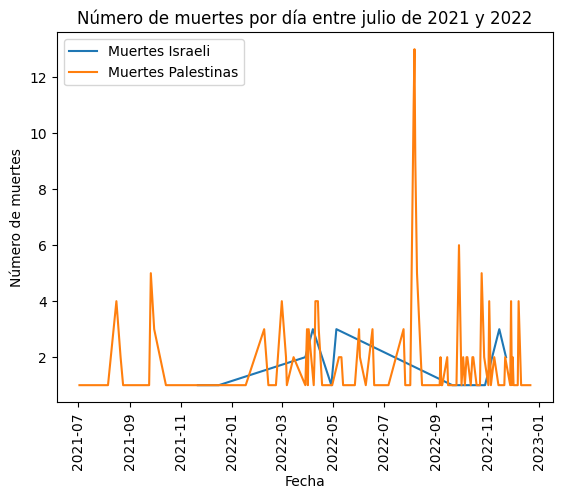

In [85]:
# Filtrar las muertes israelíes
israeli_deaths_per_day_filtered = israeli_deaths_per_day[(israeli_deaths_per_day.index >= pd.to_datetime('2021-07-01').date()) & (israeli_deaths_per_day.index <= pd.to_datetime('2022-12-31').date())]

# Filtrar las muertes palestinas
palestinian_deaths_per_day_filtered = palestinian_deaths_per_day[(palestinian_deaths_per_day.index >= pd.to_datetime('2021-07-01').date()) & (palestinian_deaths_per_day.index <= pd.to_datetime('2022-12-31').date())]

# Crear una nueva figura
plt.figure()

# Dibujar las muertes israelíes
israeli_deaths_per_day_filtered.plot(kind='line', label='Muertes Israeli')

# Dibujar las muertes palestinas
palestinian_deaths_per_day_filtered.plot(kind='line', label='Muertes Palestinas')

# Añadir una leyenda
plt.legend()

# Añadir títulos y etiquetas
plt.title('Número de muertes por día entre julio de 2021 y 2022')
plt.xlabel('Fecha')
plt.ylabel('Número de muertes')

# Rotar las etiquetas del eje x en 90 grados
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()


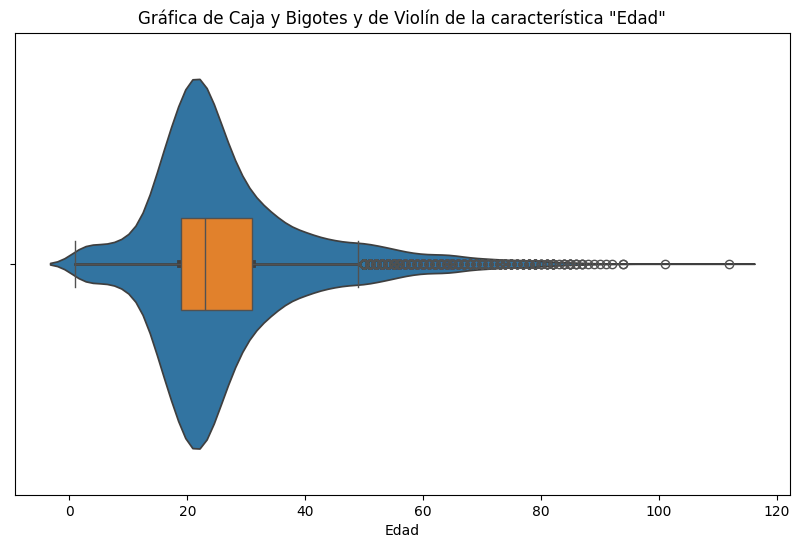

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Trazar un gráfico de violín
sns.violinplot(x='age', data=df)

# Trazar un diagrama de caja (boxplot)
sns.boxplot(x='age', data=df, width=0.2)

# Añadir título y etiquetas
plt.title('Gráfica de Caja y Bigotes y de Violín de la característica "Edad"')
plt.xlabel('Edad')

# Mostrar la gráfica
plt.show()


#### Distribución por grupos etáreos

<Axes: xlabel='Age_Group'>

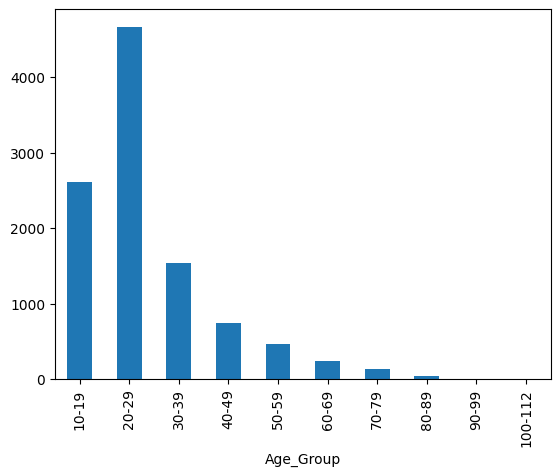

In [87]:
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-112']
age_bins = [9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 112]
df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
age_groups = df["Age_Group"].value_counts()
age_groups.sort_index().plot(kind='bar')

In [88]:
age_groups['20-29']

4664

## Prueba de Hipótesis

$$ H_{0}: \text{La probabilidad de que la persona pertenezca a un rango etáreo sigue una distribución uniforme} $$

$$ H_{1}: \text{La probabilidad de que la persona pertenezca a un rango etáreo no sigue una distribución uniforme} $$

Tenemos los datos divididos en 10 grupos etáreos, pero por simplicidad calcularemos $ P(n_i) $ suponiendo que son 4 grupos, y luego generalizaremos para 10 grupos.

Donde $n_i$ es la cantidad de personas en el rango etáreo i
$$ n_1+n_2+n_3+n_4 = N$$

$$ P(n_1, n_2,n_3,n_4) = (\frac{1}{4})^{n_1+n_2+n_3+n_4}*\frac{n_1+n_2+n_3+n_4}{n_1!n_2!n_3!n_4!}$$


$$ P(n_1) = \sum_{n_2,n_3,n_4} P(n_1, n_2,n_3,n_4) = \sum_{n_2=0}^{N-n_1}\sum_{n_3=0}^{N-n_1-n_2} P(n_1, n_2,n_3,n_4)$$

$$ P(n_1) = \sum_{n_2=0}^{N-n_1}(\frac{1}{4})^{N}\frac{N!}{n_1!n_2!(N-n_1-n_2)!}(N-n_1-n_2)!\sum_{n_3=0}^{N-n_1-n_2}\frac{1}{n_3!(N-n_1-n_2-n_3)!}$$

$$ P(n_1) = \sum_{n_2=0}^{N-n_1} (\frac{1}{4})^{N}\frac{N!}{n_1!n_2!(N-n_1-n_2)!}2^{N-n_1-n_2}$$

$$ P(n_1) = \sum_{n_2=0}^{N-n_1} (\frac{1}{4})^{N}\frac{N!}{n_1!(N-n_1)!}\frac{(N-n_1)!}{n_2!(N-n_1-n_2)!}2^{N-n_1-n_2}$$

$$ P(n_1) = (\frac{1}{4})^{N}{{N}\choose{n_1}} \sum_{n_2=0}^{N-n_1}{{N-n_1}\choose{n_2}}1^{n_2}2^{N-n_1-n_2}  $$

$$ P(n_1) = (\frac{1}{4})^{N}{{N}\choose{n_1}}3^{N-n_1} = (\frac{1}{4})^{n_1}{{N}\choose{n_1}}\frac{3^{N-n_1}}{4^{N-n_1}} $$

$$ P(n_1) = {{N}\choose{n_1}}(\frac{1}{4})^{n_1}(\frac{3}{4})^{N-n_1} $$

Por lo tanto calculamos $P(n_i)$ de la siguiente forma:
$$ P(n_i) = {{N}\choose{n_i}}p^{n_i}(1-p)^{N-n_i} $$

Donde $p$ es la probabilidad de que una persona pertenezca al rango etáreo $i$, y $N$ es el número total de personas. En el caso de 10 grupos etáreos, según nuestra Hipótesis nula, $p = \frac{1}{10}$

Teniendo esto, podemos suponer que el número de personas en cada rango etáreo se aproxima a:
 $$Np = \frac{N}{10} = E[n_i]$$

Tomemos el grupo etáreo 20-29 ($n_2$) que es donde se concentra la mayor cantidad de muertes en los datos, y calculemos la probabilidad de que haya $n_2$ o más muertes en ese grupo etáreo.

Tomemos en cuenta que en nuestros datos:
$$ N = 11124 $$
$$ n_2 = 4664  $$

Entonces calculemos:
$$ P(\overline{n_2}\gt 4664) = \sum_{n_2=4664}^{N}{{N}\choose{n_2}}p^{n_2}(1-p)^{N-n_2} $$

In [89]:
from scipy.stats import binom

p = 1/10
N = 11124
n2=4664

# Calcular la distribución acumulativa
cdf = binom.cdf(n2, N, p)

# Imprimir la distribución acumulativa
print("El p-value es: ", 1 - cdf)

cdf2 = binom.cdf(N*p, N, p)
print("Calculándolo para la media: ", 1-cdf2)

El p-value es:  0.0
Calculándolo para la media:  0.4970579311981884


Por lo tanto, como el $p-value$ es tan cercano a 0, se rechaza la Hipótesis nula.

## Análisis de Correlación entre el promedio de edad y la cantidad de muertes

Bajo el supuesto de que en un día con mayor cantidad de muertes, debería bajar el promedio de edad, puesto que se asume que la mayor cantidad de fallecidos son combatientes jóvenes, obtendremos el promedio de edad de todas las personas que fallecieron en días con igual cantidad de muertes. Luego hallaremos la correlación con la cantidad de muertes en un día.

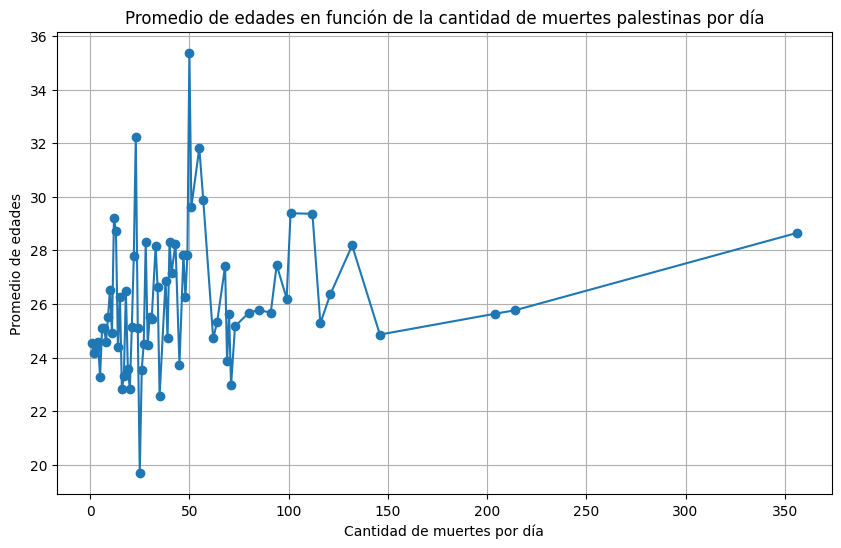

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las muertes de ciudadanos palestinos
df_palestinian = df[df['citizenship'] == 'Palestinian'].copy()

# Convertir la columna de fecha a formato datetime
df_palestinian['date_of_event'] = pd.to_datetime(df_palestinian['date_of_event'])

# Agrupar por fecha y calcular la suma de 'age' y el tamaño para cada grupo
grouped_by_date = df_palestinian.groupby(df_palestinian['date_of_event'].dt.date).agg({'age': ['sum', 'size']})

# Crear un nuevo DataFrame con 'date_of_event' como índice y 'age_sum' y 'death_count' como columnas
df_grouped = pd.DataFrame({'age_sum': grouped_by_date['age']['sum'], 'death_count': grouped_by_date['age']['size']})

# Agrupar por 'death_count' y calcular la suma total de 'age_sum' y el tamaño total para cada grupo
grouped_by_death_count = df_grouped.groupby('death_count').agg({'age_sum': 'sum', 'death_count': 'sum'})

# Calcular el promedio de las edades para cada grupo de 'death_count'
grouped_by_death_count['age_avg'] = grouped_by_death_count['age_sum'] / grouped_by_death_count['death_count']

# Graficar el promedio de las edades en función de la cantidad de muertes
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_death_count.index, grouped_by_death_count['age_avg'], marker='o')
plt.title('Promedio de edades en función de la cantidad de muertes palestinas por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Promedio de edades')
plt.grid(True)
plt.show()

In [91]:
grouped_by_death_count

,age_sum,death_count,age_avg
death_count,,,
1,25448.0,1037,24.540019
2,20491.0,848,24.163915
3,16151.0,663,24.360483
4,12971.0,528,24.566288
5,10699.0,460,23.258696
...,...,...,...
132,3720.0,132,28.181818
146,3629.0,146,24.856164
204,10459.0,408,25.634804


In [92]:
# Calcular la correlación entre 'death_count' y 'age_avg'
correlation = grouped_by_death_count['death_count'].corr(grouped_by_death_count['age_avg'])

print(f"La correlación entre la cantidad de muertes palestinas por día y el promedio de edades es: {correlation}")

La correlación entre la cantidad de muertes palestinas por día y el promedio de edades es: -0.1942817827498868


La pendiente es: 0.008497309515359975, y la intersección es: 25.667771069096357


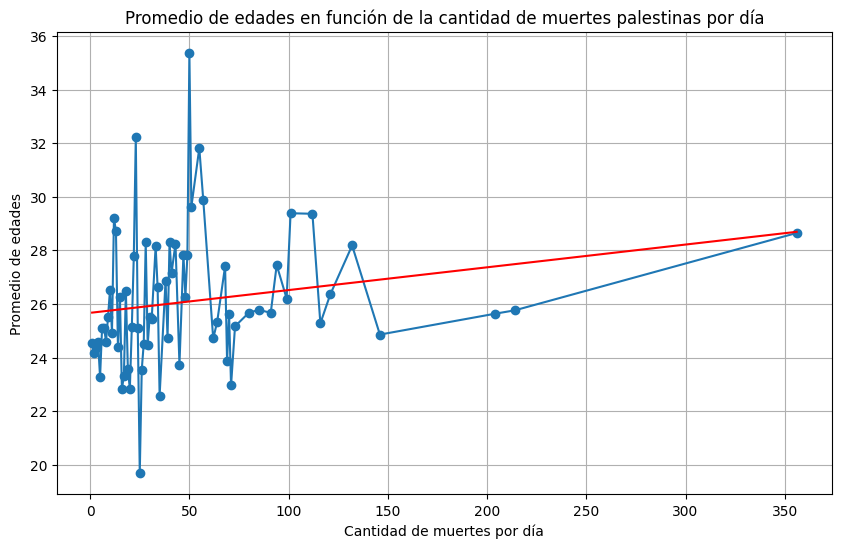

In [93]:
import numpy as np

# Realizar un ajuste lineal
slope, intercept = np.polyfit(grouped_by_death_count.index, grouped_by_death_count['age_avg'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_death_count.index, grouped_by_death_count['age_avg'], marker='o')
plt.plot(grouped_by_death_count.index, slope*grouped_by_death_count.index + intercept, color='red')  # línea de ajuste
plt.title('Promedio de edades en función de la cantidad de muertes palestinas por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Promedio de edades')
plt.grid(True)
plt.show()

Haciendo un ajuste lineal a los datos se obtuvo una recta con pendiente casi 0, lo cual coincide con la baja correlación obtenida, dato que juega en contra de la suposición hecha.

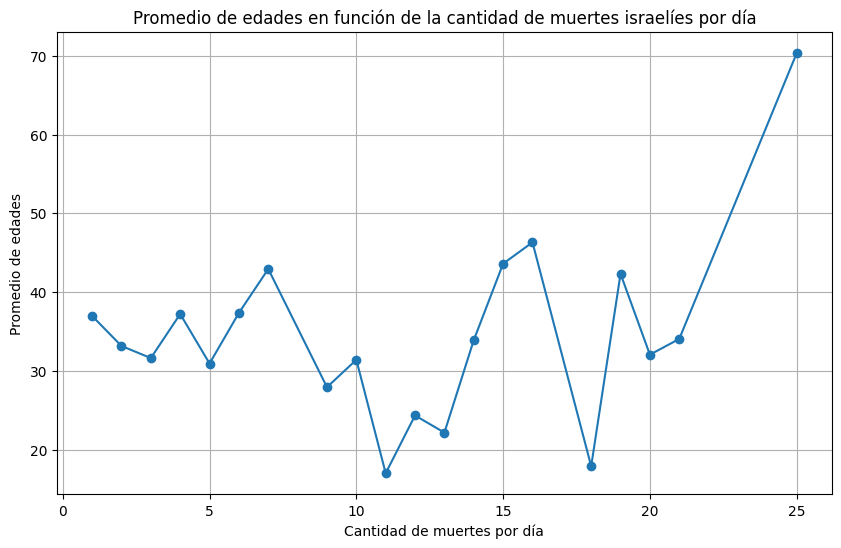

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las muertes de ciudadanos palestinos
df_israeli = df[df['citizenship'] == 'Israeli'].copy()

# Convertir la columna de fecha a formato datetime
df_israeli['date_of_event'] = pd.to_datetime(df_israeli['date_of_event'])

# Agrupar por fecha y calcular la suma de 'age' y el tamaño para cada grupo
grouped_by_date = df_israeli.groupby(df_israeli['date_of_event'].dt.date).agg({'age': ['sum', 'size']})

# Crear un nuevo DataFrame con 'date_of_event' como índice y 'age_sum' y 'death_count' como columnas
df_grouped = pd.DataFrame({'age_sum': grouped_by_date['age']['sum'], 'death_count': grouped_by_date['age']['size']})

# Agrupar por 'death_count' y calcular la suma total de 'age_sum' y el tamaño total para cada grupo
grouped_by_death_count = df_grouped.groupby('death_count').agg({'age_sum': 'sum', 'death_count': 'sum'})

# Calcular el promedio de las edades para cada grupo de 'death_count'
grouped_by_death_count['age_avg'] = grouped_by_death_count['age_sum'] / grouped_by_death_count['death_count']

# Graficar el promedio de las edades en función de la cantidad de muertes
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_death_count.index, grouped_by_death_count['age_avg'], marker='o')
plt.title('Promedio de edades en función de la cantidad de muertes israelíes por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Promedio de edades')
plt.grid(True)
plt.show()

In [95]:
grouped_by_death_count

,age_sum,death_count,age_avg
death_count,,,
1,7688.0,208,36.961538
2,4310.0,130,33.153846
3,3889.0,123,31.617886
4,2828.0,76,37.210526
5,2629.0,85,30.929412
6,2017.0,54,37.351852
7,1202.0,28,42.928571
9,754.0,27,27.925926
10,1256.0,40,31.400000


In [96]:
# Calcular la correlación entre 'death_count' y 'age_avg'
correlation = grouped_by_death_count['death_count'].corr(grouped_by_death_count['age_avg'])

print(f"La correlación entre la cantidad de muertes israelíes por día y el promedio de edades es: {correlation}")

La correlación entre la cantidad de muertes israelíes por día y el promedio de edades es: 0.07568897191453401


La pendiente es: 0.5020506790925234, y la intersección es: 28.871034262547337


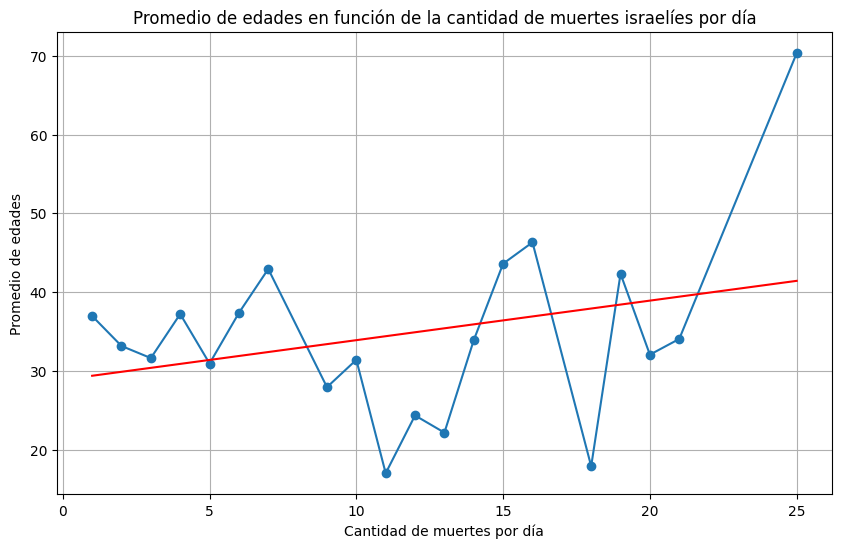

In [97]:
import numpy as np

# Realizar un ajuste lineal
slope, intercept = np.polyfit(grouped_by_death_count.index, grouped_by_death_count['age_avg'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_death_count.index, grouped_by_death_count['age_avg'], marker='o')
plt.plot(grouped_by_death_count.index, slope*grouped_by_death_count.index + intercept, color='red')  # línea de ajuste
plt.title('Promedio de edades en función de la cantidad de muertes israelíes por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Promedio de edades')
plt.grid(True)
plt.show()

Después de un análisis análogo para el caso de los israelíes, igual se obtiene baja correlación. 

## Análisis de correlación entre la cantidad de muertes y el tipo de lesión provocada

Para llevar a cabo este análisis tenemos que cuantificar los datos de la columna "type_of_injury". Para ello asigaremos un número para cada uno de los tipos de lesiones diferentes que aparecen en la data.

In [98]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'type_of_injury'
df['type_of_injury_encoded'] = le.fit_transform(df['type_of_injury'])
df_israeli['type_of_injury_encoded'] = le.fit_transform(df_israeli['type_of_injury'])
df_palestinian['type_of_injury_encoded'] = le.fit_transform(df_palestinian['type_of_injury'])

In [99]:
# Crear un dataframe para mapear 'type_of_injury' a 'type_of_injury_encoded'
mapping = pd.DataFrame({
    'type_of_injury': le.classes_,
    'type_of_injury_encoded': le.transform(le.classes_)
})

# Imprimir el mapeo
print(mapping)

          type_of_injury  type_of_injury_encoded
0                beating                       0
1              explosion                       1
2                   fire                       2
3                gunfire                       3
4       hit by a vehicle                       4
5       house demolition                       5
6   physically assaulted                       6
7               shelling                       7
8               stabbing                       8
9        stones throwing                       9
10                   NaN                      10


Veamos si el número de muertes está correlacionado con los tipos de lesión: Fuego, Explosión, Bombardeo, Demolición. Con ese objetivo calcularemos el porciento que representan las muertes provocadas por ese tipo de lesión del total de muertes en un mismo día.

In [100]:
# Calcular el número total de muertes y el número de muertes con 'type_of_injury_encoded' igual a 10 o 3 para cada día
df_grouped = df_palestinian.groupby('date_of_event').agg(
    num_deaths=pd.NamedAgg(column='type_of_injury_encoded', aggfunc='count'),
    num_deaths_with_injury_1_2_5_7=pd.NamedAgg(column='type_of_injury_encoded', aggfunc=lambda x: ((x == 1) | (x == 2) | (x==5)| (x==7)).sum())
).reset_index()

# Calcular el porcentaje de muertes con 'type_of_injury_encoded' igual a 10 o 3
df_grouped['percentage_injury_1_2_5_7'] = (df_grouped['num_deaths_with_injury_1_2_5_7'] / df_grouped['num_deaths']) * 100

# Agrupar por 'num_deaths' y obtener el porcentaje promedio de muertes con 'type_of_injury_encoded' igual a 10 o 3
df_final = df_grouped.groupby('num_deaths').agg(
    percentage_injury_1_2_5_7=pd.NamedAgg(column='percentage_injury_1_2_5_7', aggfunc='mean')
).reset_index()

# Imprimir el dataframe final
print(df_final)

    num_deaths  percentage_injury_1_2_5_7
0            1                   1.060752
1            2                   1.297170
2            3                   0.603318
3            4                   1.136364
4            5                   3.478261
..         ...                        ...
63         132                   0.000000
64         146                   0.000000
65         204                   0.000000
66         214                   0.000000
67         356                  74.719101

[68 rows x 2 columns]


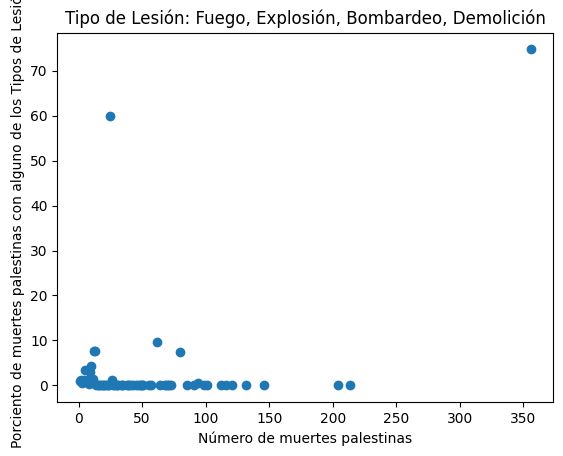

In [101]:
plt.scatter(df_final['num_deaths'], df_final['percentage_injury_1_2_5_7'])
plt.xlabel('Número de muertes palestinas')
plt.ylabel('Porciento de muertes palestinas con alguno de los Tipos de Lesión')
plt.title('Tipo de Lesión: Fuego, Explosión, Bombardeo, Demolición')
plt.show()

In [102]:
# Calcular la correlación
correlation = df_final['num_deaths'].corr(df_final['percentage_injury_1_2_5_7'])

# Imprimir la correlación
print(correlation)

0.43725680928287336


La pendiente es: 0.08726985140105915, y la intersección es: -1.894436690964587


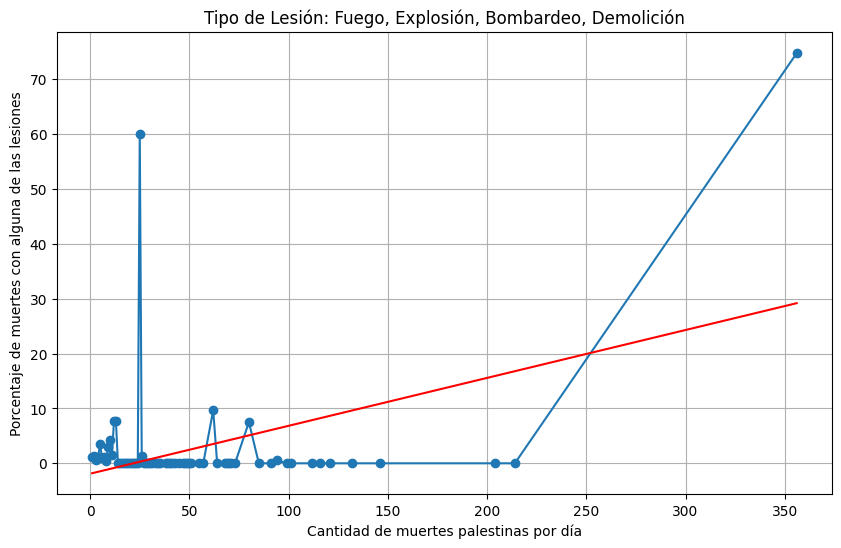

In [103]:
import numpy as np

# Realizar un ajuste lineal
slope, intercept = np.polyfit(df_final['num_deaths'], df_final['percentage_injury_1_2_5_7'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(df_final['num_deaths'], df_final['percentage_injury_1_2_5_7'], marker='o')
plt.plot(df_final['num_deaths'], slope*df_final['num_deaths'] + intercept, color='red')  # línea de ajuste
plt.title('Tipo de Lesión: Fuego, Explosión, Bombardeo, Demolición')
plt.xlabel('Cantidad de muertes palestinas por día')
plt.ylabel('Porcentaje de muertes con alguna de las lesiones')
plt.grid(True)
plt.show()

Baja correlación

In [104]:
# Calcular el número total de muertes y el número de muertes con 'type_of_injury_encoded' igual a 10 o 3 para cada día
df_grouped = df_israeli.groupby('date_of_event').agg(
    num_deaths=pd.NamedAgg(column='type_of_injury_encoded', aggfunc='count'),
    num_deaths_with_injury_8_3=pd.NamedAgg(column='type_of_injury_encoded', aggfunc=lambda x: ((x == 8) | (x == 3)).sum())
).reset_index()

# Calcular el porcentaje de muertes con 'type_of_injury_encoded' igual a 10 o 3
df_grouped['percentage_injury_8_3'] = (df_grouped['num_deaths_with_injury_8_3'] / df_grouped['num_deaths']) * 100

# Agrupar por 'num_deaths' y obtener el porcentaje promedio de muertes con 'type_of_injury_encoded' igual a 10 o 3
df_final = df_grouped.groupby('num_deaths').agg(
    percentage_injury_8_3=pd.NamedAgg(column='percentage_injury_8_3', aggfunc='mean')
).reset_index()

# Imprimir el dataframe final
print(df_final)

    num_deaths  percentage_injury_8_3
0            1              23.076923
1            2              24.615385
2            3              36.585366
3            4              42.105263
4            5              51.764706
5            6              44.444444
6            7             100.000000
7            9              88.888889
8           10              80.000000
9           11             100.000000
10          12              91.666667
11          13               0.000000
12          14              96.428571
13          15              98.666667
14          16             100.000000
15          18             100.000000
16          19             100.000000
17          20             100.000000
18          21             100.000000
19          25             100.000000


In [105]:
# Calcular la correlación
correlation = df_final['num_deaths'].corr(df_final['percentage_injury_8_3'])

# Imprimir la correlación
print(correlation)

0.685556211859828


La pendiente es: 3.3141371295785658, y la intersección es: 35.63386018744017


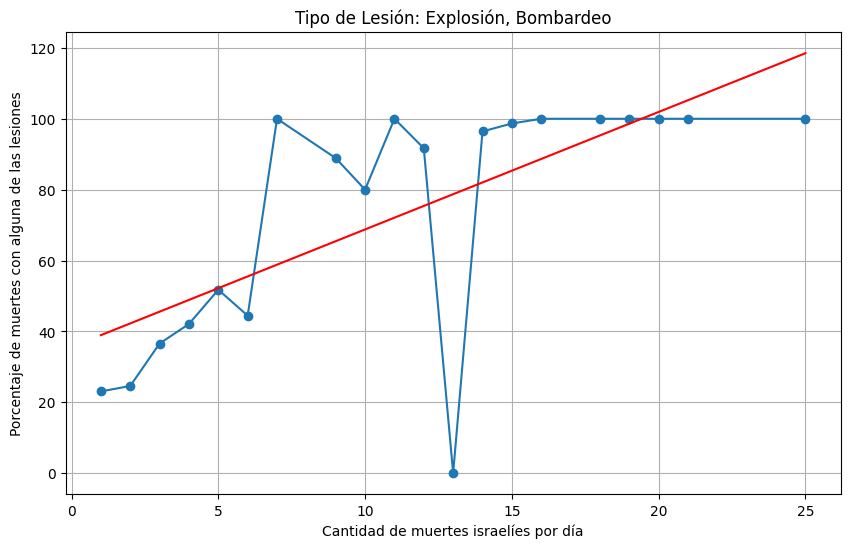

In [106]:
import numpy as np

# Realizar un ajuste lineal
slope, intercept = np.polyfit(df_final['num_deaths'], df_final['percentage_injury_8_3'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(10, 6))
plt.plot(df_final['num_deaths'], df_final['percentage_injury_8_3'], marker='o')
plt.plot(df_final['num_deaths'], slope*df_final['num_deaths'] + intercept, color='red')  # línea de ajuste
plt.title('Tipo de Lesión: Explosión, Bombardeo')
plt.xlabel('Cantidad de muertes israelíes por día')
plt.ylabel('Porcentaje de muertes con alguna de las lesiones')
plt.grid(True)
plt.show()

Como se puede observar se obtiene una alta correlación entre las muertes provocadas por los tipos de lesiones analizados (Explosión, Fuego, Bombardeo, Demolición) y la cantidad de israelíes muertos en un mismo día. 

## Regresión Lineal

#### Cuantificar los datos cualitativos

In [107]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas a codificar
columns_to_encode = ['citizenship', 'event_location_district', 'gender', 'took_part_in_the_hostilities', 'place_of_residence_district', 'type_of_injury', 'ammunition', 'killed_by']

# Diccionario para almacenar los codificadores para cada columna
encoders = {}

for column in columns_to_encode:
    le = LabelEncoder()
    df[column + '_encoded'] = le.fit_transform(df[column])
    encoders[column] = le

# Imprimir los mapeos para cada columna
for column, encoder in encoders.items():
    mapping = pd.DataFrame({
        column: encoder.classes_,
        column + '_encoded': encoder.transform(encoder.classes_)
    })
    print(f"\nMapping for {column}:")
    print(mapping)


Mapping for citizenship:
   citizenship  citizenship_encoded
0     American                    0
1      Israeli                    1
2    Jordanian                    2
3  Palestinian                    3

Mapping for event_location_district:
   event_location_district  event_location_district_encoded
0                Bethlehem                                0
1            Deir al-Balah                                1
2           East Jerusalem                                2
3                     Gaza                                3
4               Gaza Strip                                4
5               Gush Katif                                5
6                   Hebron                                6
7                   Israel                                7
8                    Jenin                                8
9                  Jericho                                9
10              Khan Yunis                               10
11                  Nablus          

#### Correlación entre columnas

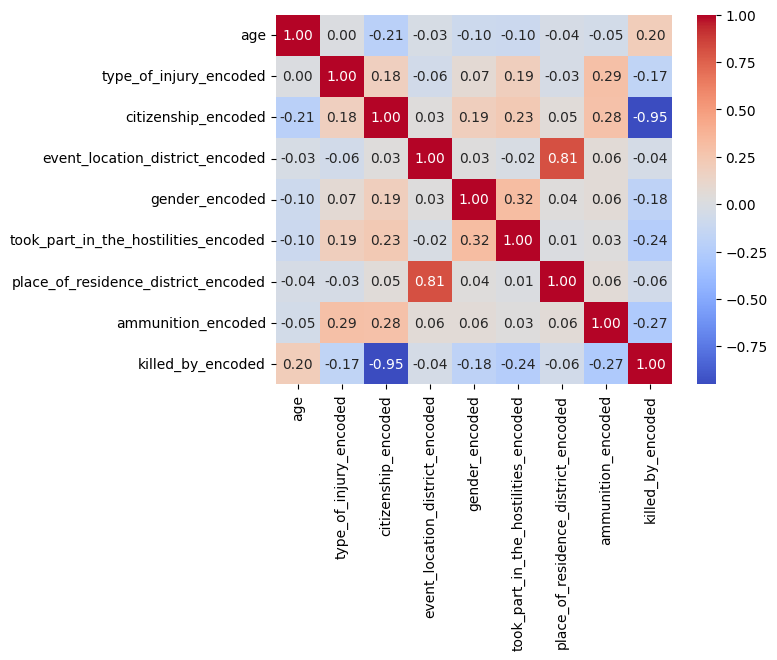

In [108]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

import seaborn as sns

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Mostrar el gráfico
plt.show()

#### Primera regresión, entre el la nacionalidad y el que ocasionó la muerte

In [109]:
import statsmodels.api as sm

# Definir la variable dependiente y la independiente
X = df_numeric['citizenship_encoded']
y = df_numeric['killed_by_encoded']

# Añadir una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

# Predictions
predictions = results.predict(X)

# Residuals
residuals = results.resid

# Imprimir el resumen de los resultados
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:      killed_by_encoded   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 1.066e+05
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:48:14   Log-Likelihood:                 10488.
No. Observations:               11124   AIC:                        -2.097e+04
Df Residuals:                   11122   BIC:                        -2.096e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4993    

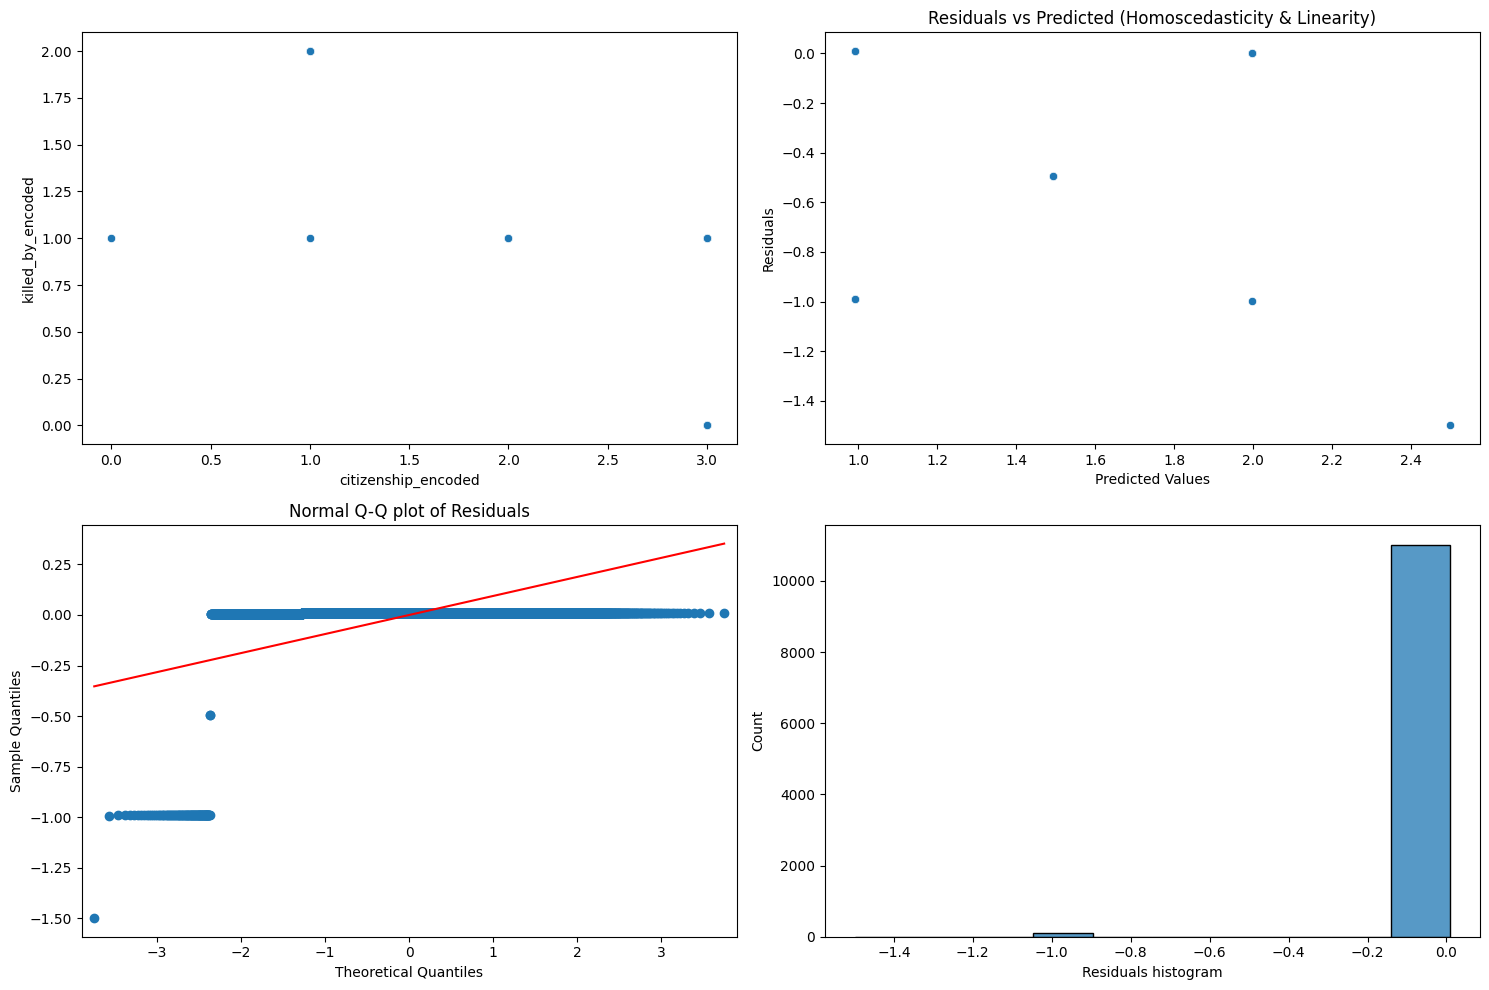

In [110]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Plott y~X
sns.scatterplot(x= X['citizenship_encoded'], y= y, markers = '.', ax = axs[0,0])

# Linearity & Homoscedasticity
sns.scatterplot(x=predictions, y=residuals, ax=axs[0, 1])
axs[0, 1].set_title('Residuals vs Predicted (Homoscedasticity & Linearity)')
axs[0, 1].set_xlabel('Predicted Values')
axs[0, 1].set_ylabel('Residuals')

# Normality of residuals
sm.qqplot(residuals, line='s', ax=axs[1, 0])
axs[1, 0].set_title('Normal Q-Q plot of Residuals')

sns.histplot(residuals, ax=axs[1, 1], bins=10)
axs[1,1].set_xlabel("Residuals histogram")

fig.tight_layout()
plt.show()

### Análisis de los supuestos

#### 1. Los errores son independientes
Test de Durbin-Watson:

$H_0$: No existe correlación entre los residuos.

$H_1$: Los residuos están autocorrelacionados.

In [111]:
from statsmodels.stats.stattools import durbin_watson


# Independence (Durbin-Watson Test)
dw_test = durbin_watson(residuals)

print(f'Test de Durbin-Watson: {dw_test}')

alpha = 0.5

# Interpretation
if 2 - alpha <= dw_test <= 2 + alpha:
    print("Los residuos no están correlacionados.")
elif dw_test > 2 + 0.5:
    print("Hay una autocorrelación positiva.")
else:
    print("Hay una autocorrelación negativa.")

Test de Durbin-Watson: 1.731151257120374
Los residuos no están correlacionados.


#### 2. El valor esperado de los errores es cero

Test para la media de una población

$H_0$: $\mu _0 = 0$

$H_1$: $\mu _0 \neq 0$.

In [112]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(residuals, 0)

print(f"T-statistic: {t_stat:.5f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.")

T-statistic: -0.00000, P-value: 1.00000
No hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.


#### 3.  La Varianza del error aleatorio es constante

Test de Breusch-Pagan para determinar la Homocedasticidad de los residuos. 

$H_0$: La homocedasticidad está presente.

$H_1$: La homocedasticidad no está presente (es decir, existe heterocedasticidad)

In [113]:
from statsmodels.stats.diagnostic import het_breuschpagan


_, bp_pvalue, _, _ = het_breuschpagan(residuals, X)

print(f'Breusch-Pagan Test p-value: {bp_pvalue}')


if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.")

Breusch-Pagan Test p-value: 0.11312377850072346
No hay suficiente evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.


#### 4. Los errores además son idénticamente distribuidos y siguen distribución normal con media cero y varianza constante

Test de Shapiro-Wilk (n < 30) o Normality Test (n >= 30).

$H_0$: Los datos siguen una distribución Normal 

$H_1$: Los datos no siguen una distribución Normal 

In [114]:
from scipy.stats import normaltest

_, norm_pvalue = normaltest(residuals)

print(f'Normality Test p-value: {norm_pvalue}')


# Interpretation
if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.")

Normality Test p-value: 0.0
No hay suficiente evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.


Se cumplen los supuestos :smiley:

#### Segunda regresión, entre el número de muertes israelíes y el porciento de muertes por lesiones de tipo: Explosión, Bombardeo, Fuego, Demolición

In [115]:
import statsmodels.api as sm

# Definir la variable dependiente y la independiente
X = df_final['num_deaths']
y = df_final['percentage_injury_8_3']

# Añadir una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

# Predictions
predictions = results.predict(X)

# Residuals
residuals = results.resid

# Imprimir el resumen de los resultados
print(results.summary())


                              OLS Regression Results                             
Dep. Variable:     percentage_injury_8_3   R-squared:                       0.470
Model:                               OLS   Adj. R-squared:                  0.441
Method:                    Least Squares   F-statistic:                     15.96
Date:                   Mon, 08 Apr 2024   Prob (F-statistic):           0.000849
Time:                           00:48:17   Log-Likelihood:                -91.776
No. Observations:                     20   AIC:                             187.6
Df Residuals:                         18   BIC:                             189.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6339 

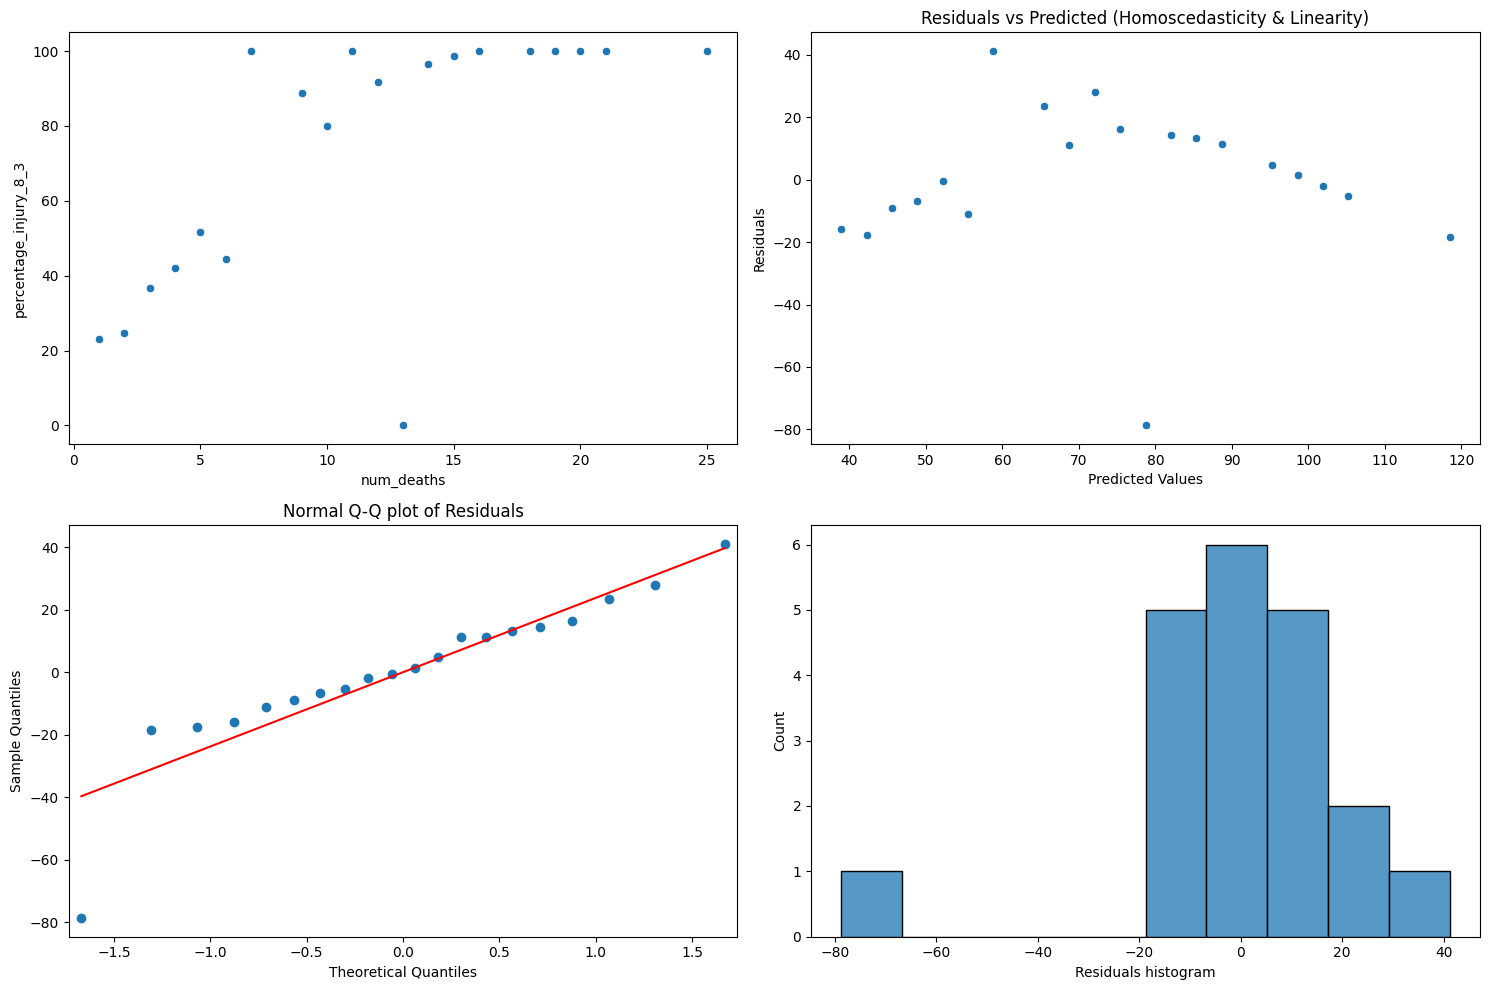

In [116]:
# Plotting
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

#Plott y~X
sns.scatterplot(x= X['num_deaths'], y= y, markers = '.', ax = axs[0,0])

# Linearity & Homoscedasticity
sns.scatterplot(x=predictions, y=residuals, ax=axs[0, 1])
axs[0, 1].set_title('Residuals vs Predicted (Homoscedasticity & Linearity)')
axs[0, 1].set_xlabel('Predicted Values')
axs[0, 1].set_ylabel('Residuals')

# Normality of residuals
sm.qqplot(residuals, line='s', ax=axs[1, 0])
axs[1, 0].set_title('Normal Q-Q plot of Residuals')

sns.histplot(residuals, ax=axs[1, 1], bins=10)
axs[1,1].set_xlabel("Residuals histogram")

fig.tight_layout()
plt.show()

In [117]:
from statsmodels.stats.stattools import durbin_watson


# Independence (Durbin-Watson Test)
dw_test = durbin_watson(residuals)

print(f'Test de Durbin-Watson: {dw_test}')

alpha = 0.5

# Interpretation
if 2 - alpha <= dw_test <= 2 + alpha:
    print("Los residuos no están correlacionados.")
elif dw_test > 2 + 0.5:
    print("Hay una autocorrelación positiva.")
else:
    print("Hay una autocorrelación negativa.")

Test de Durbin-Watson: 1.922952400025487
Los residuos no están correlacionados.


In [118]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(residuals, 0)

print(f"T-statistic: {t_stat:.5f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.")

T-statistic: 0.00000, P-value: 1.00000
No hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.


In [119]:
from statsmodels.stats.diagnostic import het_breuschpagan


_, bp_pvalue, _, _ = het_breuschpagan(residuals, X)

print(f'Breusch-Pagan Test p-value: {bp_pvalue}')


if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.")

Breusch-Pagan Test p-value: 0.9755846376703973
No hay suficiente evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.


In [120]:
from scipy.stats import normaltest

_, norm_pvalue = normaltest(residuals)

print(f'Normality Test p-value: {norm_pvalue}')


# Interpretation
if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.")

Normality Test p-value: 0.00033927337704186265
No hay suficiente evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.


Se cumplen los supuestos :smiley:

## Análisis de Componentes Principales (PCA)

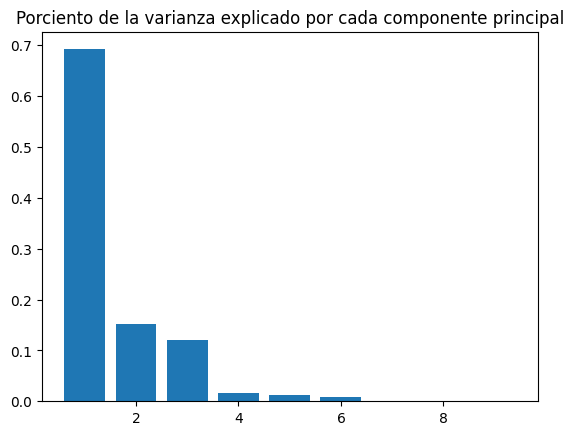

In [121]:
from sklearn.decomposition import PCA

# Rellenar los valores NaN con la media de la columna
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

# Crear el objeto PCA
pca_breast = PCA()

# Ajustar y transformar los datos
pca_breast.fit_transform(df_numeric_filled)

variance_ratio = pca_breast.explained_variance_ratio_
plt.bar(np.arange(variance_ratio.shape[0]) + 1, variance_ratio)
plt.title("Porciento de la varianza explicado por cada componente principal")
plt.show()

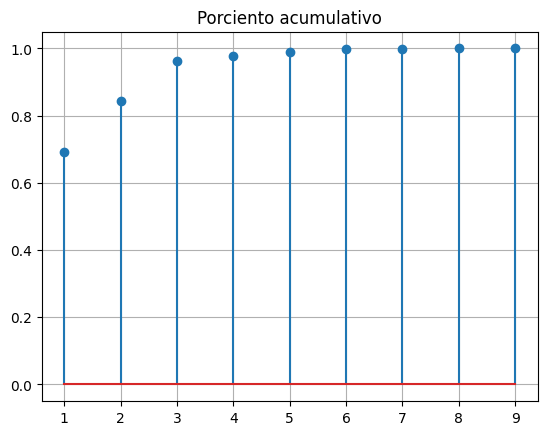

In [122]:
cum_variance = pca_breast.explained_variance_ratio_.cumsum()
plt.stem(np.arange(variance_ratio.shape[0]) + 1, cum_variance)
plt.title("Porciento acumulativo")
plt.grid()


Seleccionamos las 3 primeras componentes

In [123]:
component_count = 3
pca_breast = PCA(component_count)
principalComponents_breast = pca_breast.fit_transform(df_numeric_filled)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast)
analysis = pd.DataFrame(pca_breast.components_, columns=df_numeric_filled.columns, index=[f'PC{i}' for i in range(1,component_count+1)]).T
analysis

,PC1,PC2,PC3
age,0.999309,0.026196,-0.021016
type_of_injury_encoded,-0.000113,0.006097,-0.094391
citizenship_encoded,-0.009060,0.009031,-0.026387
event_location_district_encoded,-0.012949,0.704394,0.195933
gender_encoded,-0.002330,0.002035,-0.002617
took_part_in_the_hostilities_encoded,-0.012586,-0.001834,-0.009226
place_of_residence_district_encoded,-0.014999,0.658178,0.177425
ammunition_encoded,-0.026868,0.264185,-0.959074
killed_by_encoded,0.004599,-0.005026,0.012996


#### Presencia de cada característica en cada componente.

<Axes: >

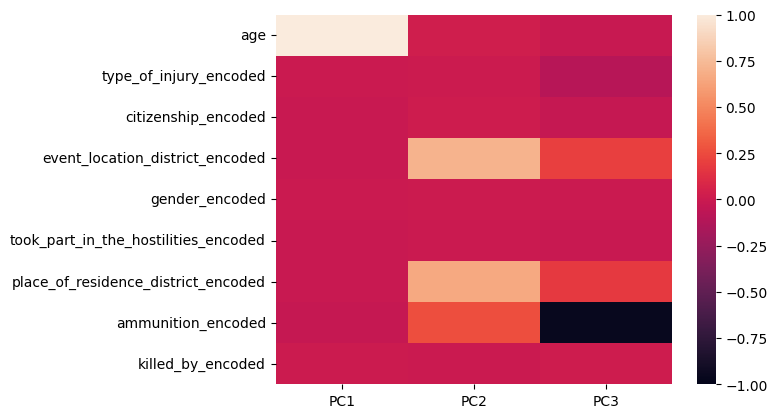

In [124]:
sns.heatmap(analysis, vmin=-1, vmax=1)

## ANOVA (Análisis de la Varianza)

#### Hipótesis para ANOVA

$H_0$: $\mu_0 = \mu_1 = ... = \mu_n$ donde $\mu_i$ es la media de la edad para diferentes `event_location_region`.

$H_1$: Al menos una media μ es diferente de las demás.



In [125]:
# Rellenar los valores NaN en la columna 'age' con la media de los otros valores
df['age'].fillna(df['age'].mean(), inplace=True)

df_clean = df.dropna(axis=1)

In [126]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajusta el modelo ANOVA
modelo_anova = ols('age ~ event_location_region', data=df_clean).fit()

# Realiza el análisis de varianza (ANOVA)
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)

# Muestra la tabla ANOVA
print(tabla_anova)

                             sum_sq       df           F        PR(>F)
event_location_region  6.499433e+04      2.0  178.663313  4.246088e-77
Residual               2.022805e+06  11121.0         NaN           NaN


Los resultados de la tabla ANOVA se interpretan de la siguiente manera:

- sum_sq: Esta es la suma de cuadrados. Para `event_location_region`, es la variabilidad explicada por `event_location_region`. Para Residual, es la variabilidad no explicada por `event_location_region`.

- df: Este es el grado de libertad. Para `event_location_region`, es el número de grupos menos 1. Para Residual, es el número total de observaciones menos el número de grupos.

- F: Este es el valor F, que es la razón entre la variabilidad explicada por `event_location_region` y la variabilidad no explicada por `event_location_region`. Un valor F grande sugiere que al menos uno de los grupos es significativamente diferente de los otros.

- PR(>F): Este es el valor p, que es la probabilidad de obtener un valor F tan grande o mayor si la hipótesis nula es verdadera (es decir, si todos los grupos son realmente iguales). Un valor p pequeño sugiere que se puede rechazar la hipótesis nula.

En este caso, el valor p para `event_location_region` es extremadamente pequeño (6.698102e-77), lo que sugiere que hay una diferencia significativa en la edad entre al menos dos de las regiones.

#### Análisis con prueba Post-hoc de Tukey

In [127]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
tukey_results = pairwise_tukeyhsd(endog=df_clean['age'], groups=df_clean['event_location_region'], alpha=0.05)

# Muestra los resultados
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2  meandiff p-adj   lower    upper  reject
------------------------------------------------------------
Gaza Strip    Israel  10.1758    0.0   8.9104 11.4411   True
Gaza Strip West Bank   0.4015 0.3763   -0.304   1.107  False
    Israel West Bank  -9.7743    0.0 -11.1309 -8.4177   True
------------------------------------------------------------


#### Análisis de los supuestos

Supuestos:

- Las poblaciones de las que se extraen las muestras tienen distribuciones normales.
- Las poblaciones tienen varianzas iguales (homocedasticidad).
- Las muestras son independientes entre sí.

#### 1. Poblaciones normales. Test de Anderson-Darling para cada grupo.


$H_0$: Los datos siguen una distribución Normal 

$H_1$: Los datos no siguen una distribución Normal 

In [128]:
from scipy import stats

# Segmentar los datos por 'event_location_region'
groups = df.groupby('event_location_region')

# Obtener el nombre del primer grupo
first_group_name = list(groups.groups.keys())[0]

# Obtener los datos de 'age' para el primer grupo
first_group_data = groups.get_group(first_group_name)['age']

# Aplicar la prueba de Anderson-Darling a los datos de 'age' del primer grupo
result = stats.anderson(first_group_data)

print('Group1 - Anderson-Darling Test: Statistics=%.3f' % result.statistic)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probablemente normal a nivel de significancia %.1f%%' % sl)
    else:
        print('Probablemente no normal a nivel de significancia %.1f%%' % sl)

Group1 - Anderson-Darling Test: Statistics=240.779
Probablemente no normal a nivel de significancia 15.0%
Probablemente no normal a nivel de significancia 10.0%
Probablemente no normal a nivel de significancia 5.0%
Probablemente no normal a nivel de significancia 2.5%
Probablemente no normal a nivel de significancia 1.0%


#### 2. Homogeneidad de los errores. Test de Levene

$H_0$: Igualdad de varianzas (Homocedasticidad)

$H_1$: Las varianzas son diferentes

In [129]:
from scipy import stats

# Segmentar los datos por 'event_location_region'
groups = df.groupby('event_location_region')

# Obtener los datos de 'age' para cada grupo
group_data = [groups.get_group(group)['age'] for group in groups.groups.keys()]

# Aplicar la prueba de Levene a los datos de 'age' de cada grupo
stat, p = stats.levene(*group_data)

print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que las varianzas son iguales.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que las varianzas son iguales.")

Levene Test: Statistics=168.838, p=0.000
Hay evidencia para rechazar la hipótesis nula de que las varianzas son iguales.


#### 3. Independencia de las Observaciones. Test de Durbin-Watson

$H_0$: No existe correlación entre los residuos.

$H_1$: Los residuos están autocorrelacionados.

In [130]:
from statsmodels.stats.stattools import durbin_watson

# Obtener los datos de 'age' para el primer grupo
first_group_data = groups.get_group(first_group_name)['age']

# Calcula el estadístico de Durbin-Watson
dw = durbin_watson(first_group_data)

print(f"Estadístico de Durbin-Watson: {dw}")

alpha = 0.5

if 2 - alpha <= dw <= 2 + alpha:
    print("Los residuos no están correlacionados.")
elif dw > 2 + alpha:
    print("Hay una autocorrelación positiva.")
else:
    print("Hay una autocorrelación negativa.")

Estadístico de Durbin-Watson: 0.38644817332960807
Hay una autocorrelación negativa.


No se cumplen los supuestos :smiley:
